In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Load dataset
df = pd.read_excel(r"C:\Users\bhara\Documents\Airlink project\MLRData.xlsx")

# X - independent variables, y - target variable
X = df[['AW', 'Cost', 'Distance']] 
y = df['Aircraft_Type']

# Target variable encoded
le = LabelEncoder()
y = le.fit_transform(y)

#Training, test set 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Fitting MNLR model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Calculate baseline (what happens if we only predict the most common class?)
baseline_acc = df['Aircraft_Type'].value_counts(normalize=True).max()
print(f"Baseline Accuracy (Majority Class - Widebody): {baseline_acc:.2%}")

if accuracy < baseline_acc:
    print("Model is performing worse than baseline model with majority class (naive guess).")

#Accuracy test
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2%}")

Baseline Accuracy (Majority Class - Widebody): 77.55%
Model is performing worse than baseline model with majority class (naive guess).
Test Accuracy: 59.26%


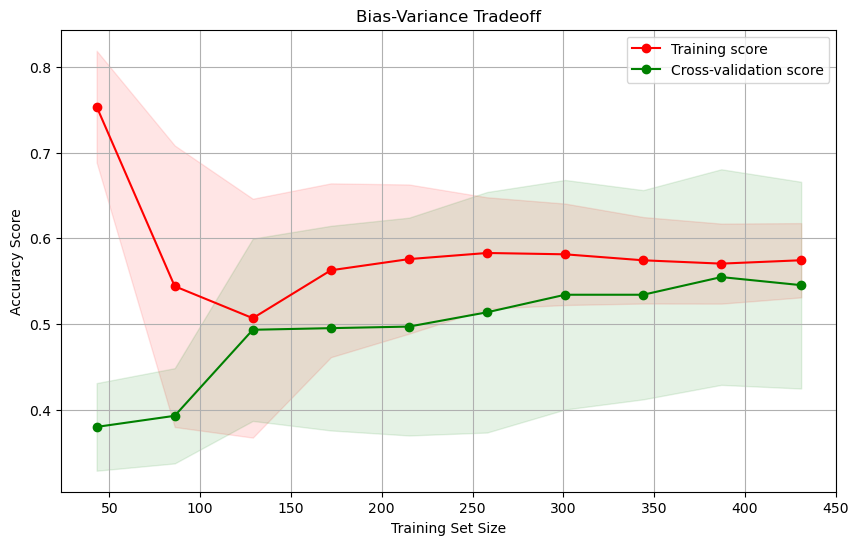

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Scaled independent variables
X_scaled_full = scaler.fit_transform(X) 

#Learning curve of data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled_full, y, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#mean and standard deviation of dataset
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

#Variance shown using color coding
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Bias-Variance Tradeoff")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.grid()
plt.show()